Importing necessary modules

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import math
import support_file as sf


Importing the data 

In [44]:
#Allgemeine Ausgabgsdaten 
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_cat = data[["Email","Address"]]

#Daten aus Pandas OneHotEncoding - bereinigten & codierten (0/1) Werte 
data_hot_clustering = sf.data_hot_clustering

data_hot_clustering_num_vis=data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]


In [45]:
data_hot_clustering.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State,State group,HIGH,LOW,MEDIUM
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI,MEDIUM,0,0,1
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA,LOW,0,1,0
2,34.305557,13.717514,36.721283,3.120179,581.852344,OH,LOW,0,1,0
3,33.871038,12.026925,34.476878,5.493507,637.102448,MN,HIGH,1,0,0
4,32.021596,11.366348,36.683776,4.685017,521.572175,WV,MEDIUM,0,0,1


In [46]:
#transform cm to inch:
def cm_to_inch(value):
    return value/2.54
cm_to_inch(20)

7.874015748031496

Univariate visual data analysis 

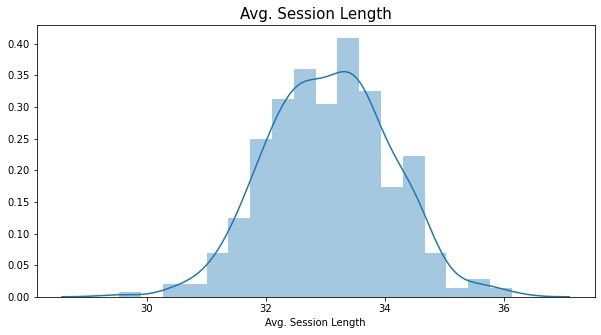

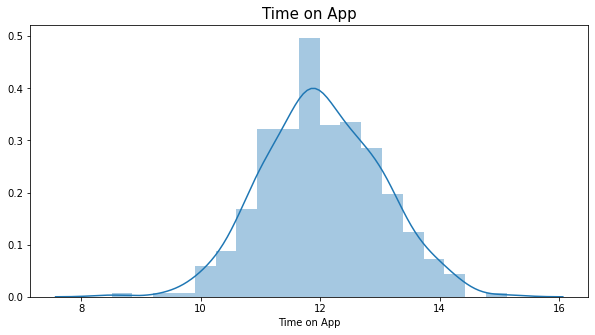

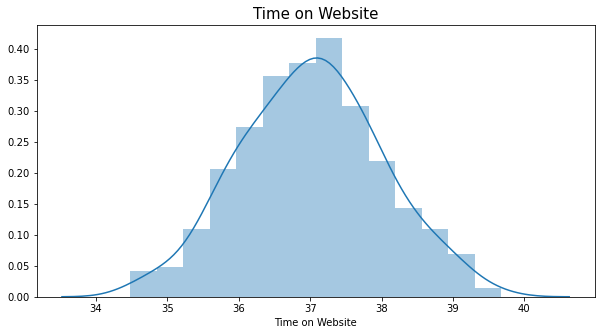

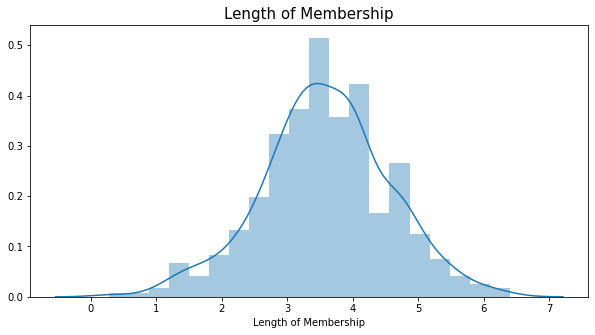

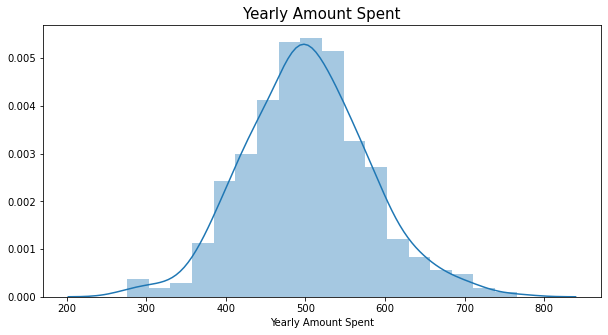

In [47]:
#Verteilungen numerischer Variablen  

def distplot(x):
    for i in x:
        fig = plt.figure(2, figsize=(10,5))
        sns.distplot(x[i], kde=True)
        plt.title(i ,fontsize=15)
        plt.show()

distplot(data_hot_clustering_help)

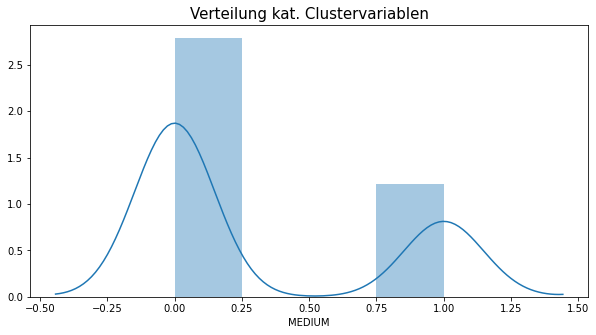

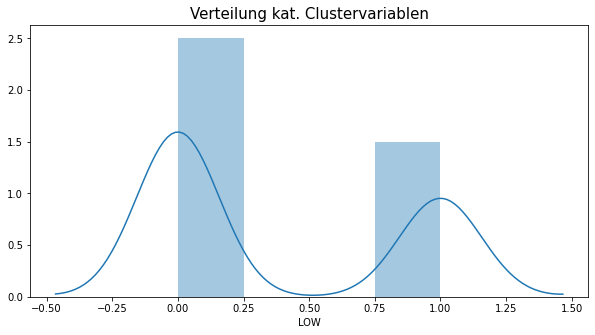

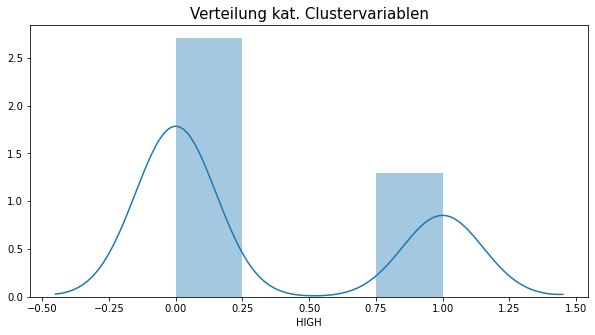

In [48]:
#Verteilung kategorialer Variablen 
fig = plt.figure(3, figsize=(10,5))
sns.distplot(data_hot_clustering["MEDIUM"], kde=True)
plt.title('Verteilung kat. Clustervariablen', fontsize=15)
plt.show()


fig = plt.figure(3, figsize=(10,5))
sns.distplot(data_hot_clustering["LOW"], kde=True)
plt.title('Verteilung kat. Clustervariablen', fontsize=15)
plt.show()


fig = plt.figure(3, figsize=(10,5))
sns.distplot(data_hot_clustering["HIGH"], kde=True)
plt.title('Verteilung kat. Clustervariablen', fontsize=15)
plt.show()


In [49]:
Bivariat data analysis 

SyntaxError: invalid syntax (<ipython-input-49-ecfbf120cae0>, line 1)

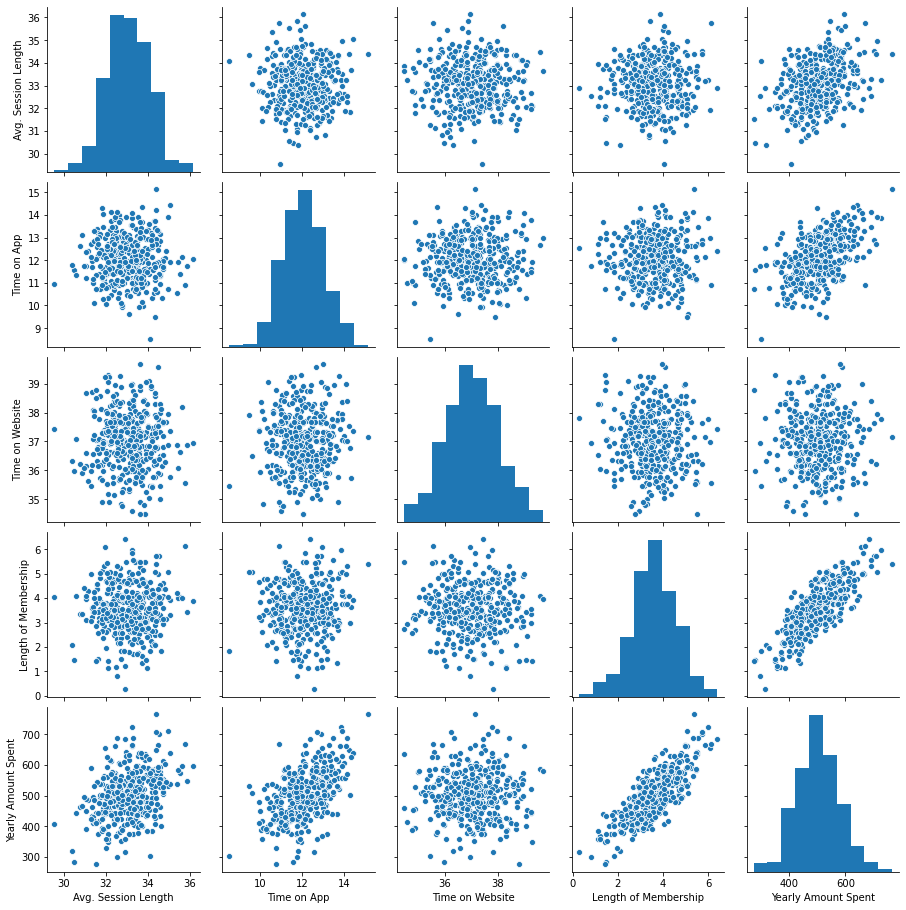

In [60]:
#Overviewing relationships across the entire data frame 
def pairplot_def(x):
    sns.pairplot(x)
    plt.show()

pairplot_def(data_hot_clustering_num_vis)

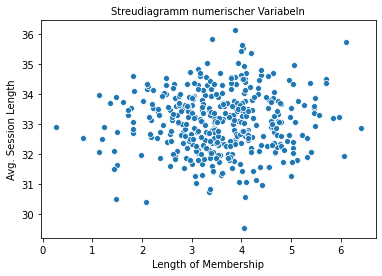

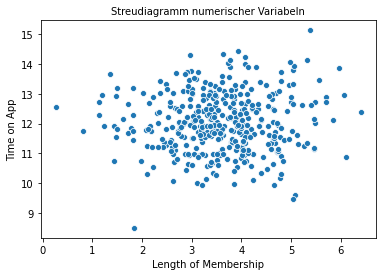

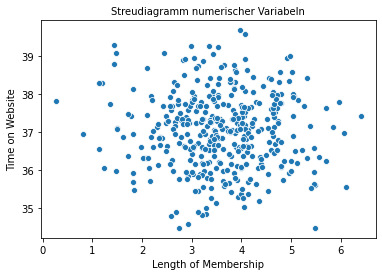

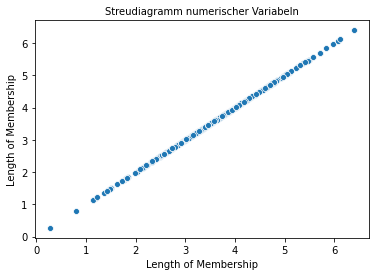

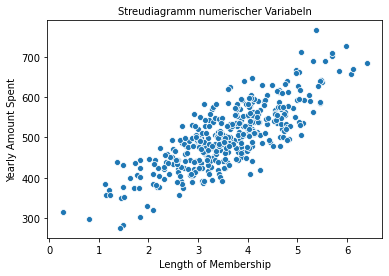

In [146]:
#Scatterplot Block A zu zu "Length of Membership"
def scatter (x):
    plt.figure()
    for i in x:
        sns.scatterplot(x=data_hot_clustering_num_vis["Length of Membership"], y=i, data=x)
        plt.title('Streudiagramm numerischer Variabeln', fontsize=10)
        plt.show()

scatter(data_hot_clustering_num_vis)



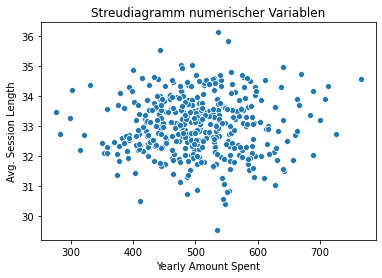

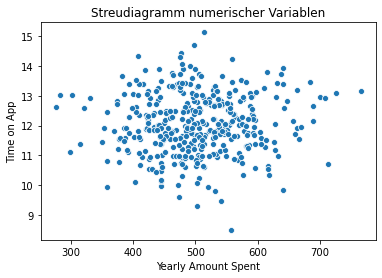

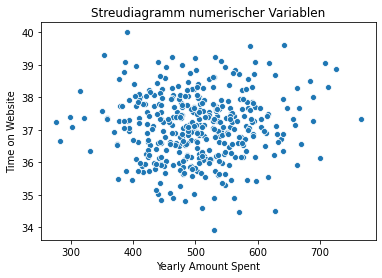

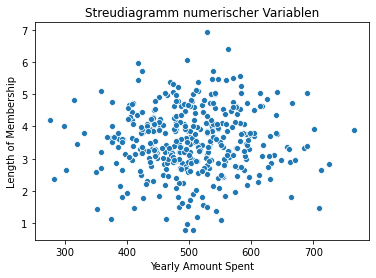

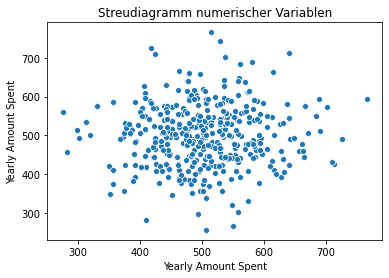

In [147]:
#Scatterplot numerischer V zu "Yearly Amount Spent"
def scatter2 (x):
    for i in x:
        sns.scatterplot(x=data_hot_clustering_num_vis["Yearly Amount Spent"], y=i, data=data)
        plt.title('Streudiagramm numerischer Variablen')
        plt.show()

scatter2(data_hot_clustering_num_vis)

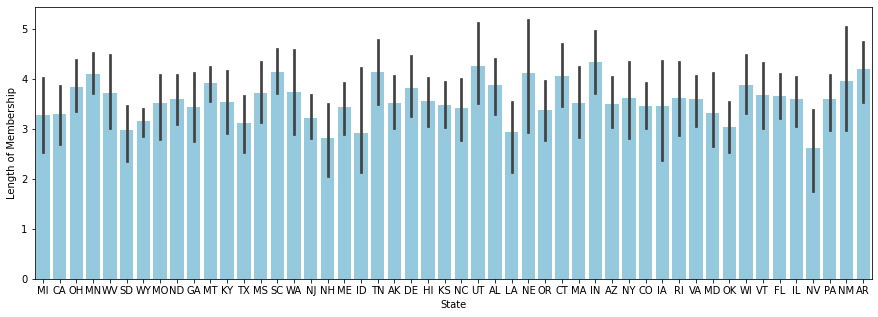

In [16]:
#Balkendiagramm über für Yearly Amount Spent über  alle Staat

fig = plt.figure(2, figsize=(15,5))
ax = fig.add_subplot() 
sns.barplot(x=data_hot_clustering['State'], y=data_hot_clustering_help["Length of Membership"], color="skyblue")

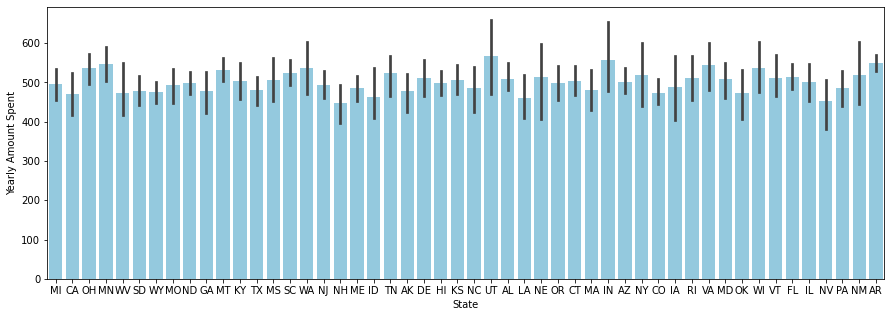

In [15]:
#Balkendiagramm über für Yearly Amount Spent über  alle Staat

fig = plt.figure(2, figsize=(15,5))
ax = fig.add_subplot() 
sns.barplot(x=data_hot_clustering['State'], y=data_hot_clustering_help["Yearly Amount Spent"], color="skyblue")

In [18]:
#x_list

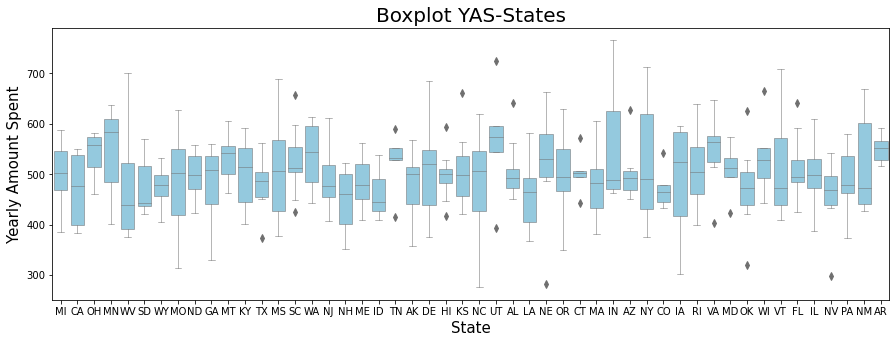

In [17]:
fig = plt.figure(1, figsize=(15,5))
ax = fig.add_subplot()


ax= sns.boxplot(x=data_hot_clustering['State'], y=data_hot_clustering['Yearly Amount Spent'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=15)
plt.ylabel('Yearly Amount Spent', fontsize=15)
plt.title('Boxplot YAS-States', fontsize=20)
plt.show()



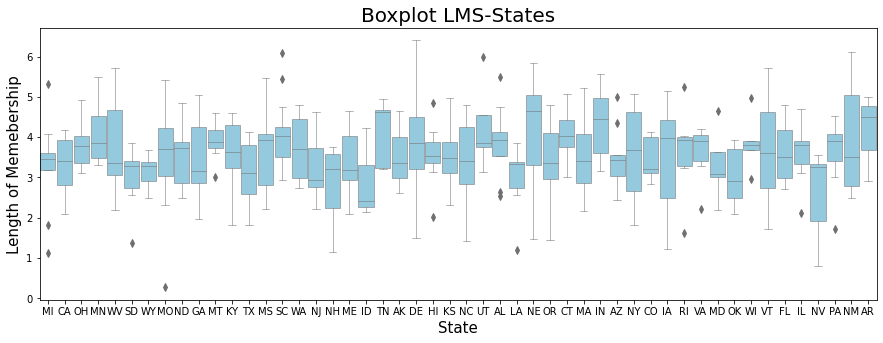

In [19]:
fig = plt.figure(2, figsize=(15,5))
ax = fig.add_subplot()

sns.boxplot(x=data_hot_clustering['State'], y=data_hot_clustering['Length of Membership'],width=0.9, linewidth=0.5, fliersize=5,color="skyblue")
plt.xlabel('State',fontsize=15)
plt.ylabel('Length of Memebership', fontsize=15)
plt.title('Boxplot LMS-States', fontsize=20)
plt.show()


Multivariate visual data analysis 

New Customer dataframe in regards to YAS 

In [58]:
#Data_Hot_Clustering als Grundlage für customers_yas_list 
#um Yearly Amount Spent als neue Spalte zur Auswertung 


data_hot_clustering_help = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

customers_yas_list = []

for i in data_hot_clustering_help["Yearly Amount Spent"]:
 
    if i < 350 :
        customers_yas_list.append("LOWEST")
    if i < 550: 
        customers_yas_list.append("MIDDLE")
    else:
       customers_yas_list.append("TOP")


customers_yas_series_new = pd.Series(customers_yas_list)

data_hot_clustering_yas_new = pd.concat([data_hot_clustering_help, customers_yas_series_new], axis=1)
            
data_hot_clustering_yas_new.columns = ["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","YASCAT"]

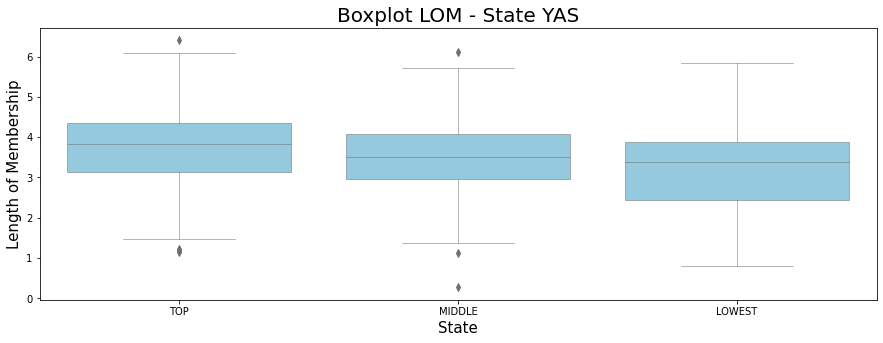

In [59]:
fig = plt.figure(4, figsize=(15,5))
ax = fig.add_subplot()

ax= sns.boxplot(x=data_hot_clustering_yas_new["YASCAT"], y=data_hot_clustering_yas_new["Length of Membership"], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=15)
plt.ylabel("Length of Membership", fontsize=15)
plt.title("Boxplot LOM - State YAS", fontsize=20)
plt.show()



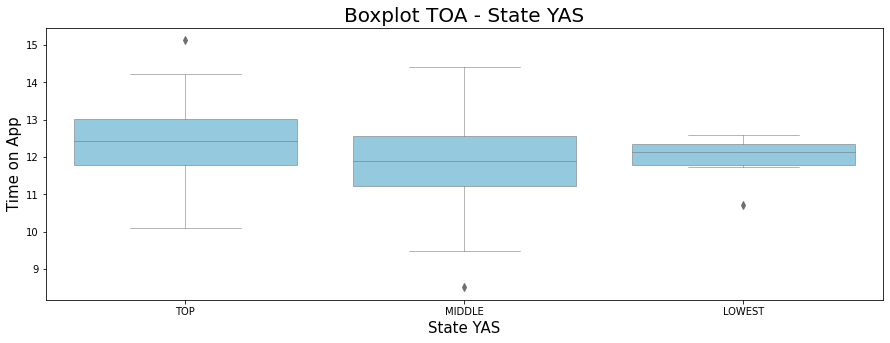

In [61]:
fig = plt.figure(4, figsize=(15,5))
ax = fig.add_subplot()

ax= sns.boxplot(x=data_hot_clustering_yas_new["YASCAT"], y=data_hot_clustering_yas_new["Time on App"], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State YAS',fontsize=15)
plt.ylabel("Time on App", fontsize=15)
plt.title('Boxplot TOA - State YAS', fontsize=20)
plt.show()
